In [38]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [39]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [40]:
!pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
df=pd.read_csv('nasdaq100.csv', sep=";")
df

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700
5,01.08.23,16800,16400
6,01.07.23,15900,16200
7,01.06.23,15800,15500
8,01.05.23,16150,16100
9,01.04.23,16300,15800


In [6]:
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [7]:
df=df.drop(columns="Date")
df

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700
5,16800,16400
6,15900,16200
7,15800,15500
8,16150,16100
9,16300,15800


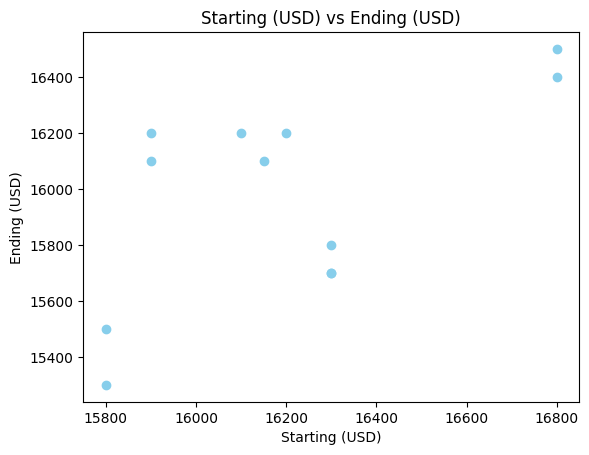

In [8]:
# plt.scatter(df["Starting (USD)"], df["Ending (USD)"], marker='o')

plt.scatter(
    df["Starting (USD)"].astype(float),
    df["Ending (USD)"].astype(float),
    color='skyblue',
)
plt.xlabel("Starting (USD)")
plt.ylabel("Ending (USD)")
plt.title("Starting (USD) vs Ending (USD)")
plt.show()

In [9]:
x=df.drop("Ending (USD)",axis=1)
x

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300
5,16800
6,15900
7,15800
8,16150
9,16300


In [10]:
y=df.drop("Starting (USD)",axis=1)
y

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700
5,16400
6,16200
7,15500
8,16100
9,15800


In [11]:
x.mean()

Starting (USD)    16195.833333
dtype: float64

In [12]:
y.mean()

Ending (USD)    15975.0
dtype: float64

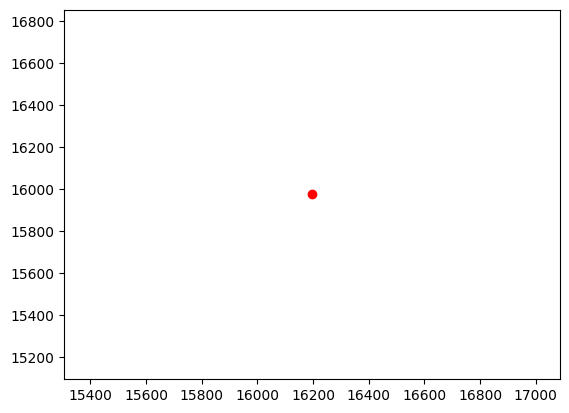

In [13]:
plt.scatter(x.mean(),y.mean(),color="red")

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
reg=LinearRegression()

In [16]:
reg.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
reg.coef_

array([[0.65258293]])

In [18]:
reg.intercept_

array([5405.87555702])

In [19]:
reg.predict([[16700]])

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

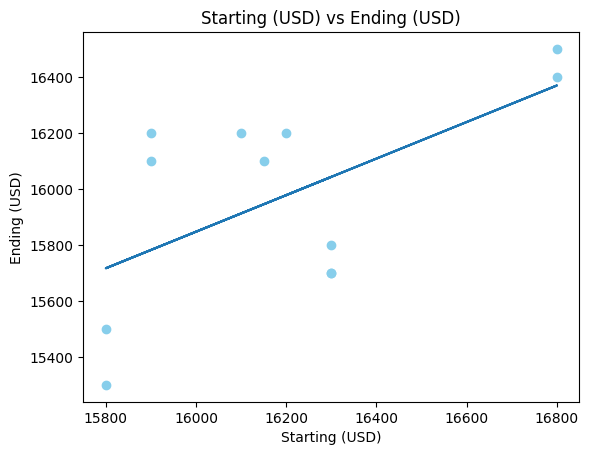

In [20]:
plt.plot(x,reg.predict(x))
plt.scatter(
    df["Starting (USD)"].astype(float),
    df["Ending (USD)"].astype(float),
    color='skyblue',
)
plt.xlabel("Starting (USD)")
plt.ylabel("Ending (USD)")
plt.title("Starting (USD) vs Ending (USD)")
plt.show()

In [21]:
df['prdicted_y']=reg.predict(x)
df

,Starting (USD),Ending (USD),prdicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389
5,16800,16400,16369.268856
6,15900,16200,15781.944215
7,15800,15500,15716.685922
8,16150,16100,15945.089949
9,16300,15800,16042.977389


lose and cost

In [22]:
df['lose']=df['Ending (USD)']-df['prdicted_y']
df.head()

,Starting (USD),Ending (USD),prdicted_y,lose
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389


In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
mse=mean_squared_error(df['Ending (USD)'],df['prdicted_y'])
mse

80411.23397700385

In [25]:
reg.score(x,y)

0.3577804940272571

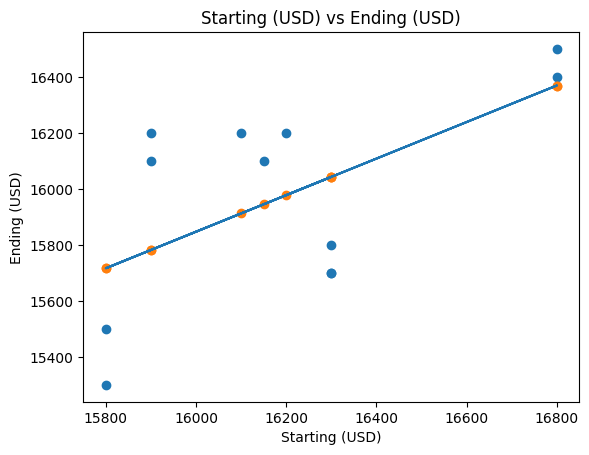

In [26]:
plt.plot(x,reg.predict(x))
plt.scatter(df["Starting (USD)"],df["Ending (USD)"])
plt.scatter(df["Starting (USD)"],df["prdicted_y"])
plt.xlabel("Starting (USD)")
plt.ylabel("Ending (USD)")
plt.title("Starting (USD) vs Ending (USD)")
plt.show()

In [42]:
from sklearn.metrics import r2_score
r2_score(y,reg.predict(x))

0.3577804940272571